<a href="https://colab.research.google.com/github/e-hkr/SR_practice/blob/main/visualization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

In [ ]:
!pip install japanize-matplotlib

# imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
BASE_DIR = 'xxx'

# データの読み込み
with open(f'{BASE_DIR}/results/pred.pickle', 'rb') as f:
  data = pickle.load(f)

# graphs・images

__グラフ・画像__  
【凡例】P：降水量、T：気温、R：湿数、U：東西風、V：南北風、W：風速、D：風向
1. 気温平均日変動
1. 湿数平均日変動
1. 風速平均日変動
1. 時系列方向合計降水量
1. 時系列方向最大降水量
1. 時系列方向降水量99.9%タイル値
1. 時系列方向降水量99%タイル値
1. 時系列方向降水量90%タイル値
1. 時系列方向降水量50%タイル値
1. 時系列方向平均気温
1. 時系列方向最高気温
1. 時系列方向最低気温
1. 時系列方向平均湿数
1. 時系列方向最高湿数
1. 時系列方向最低湿数
1. 時系列方向平均東西風
1. 時系列方向平均南北風
1. 時系列方向平均風速
1. 時系列方向最大風速
1. 時系列方向降水量のRMSE
1. 時系列方向気温のRMSE
1. 時系列方向湿数のRMSE
1. 時系列方向東西風のRMSE
1. 時系列方向南北風のRMSE
1. 時系列方向風速のRMSE
1. 時系列方向降水量のME
1. 時系列方向気温のME
1. 時系列方向湿数のME
1. 時系列方向東西風のME
1. 時系列方向南北風のME
1. 時系列方向風速のME
1. 降水量0.1mm/h以上の発生確率
1. 降水量1mm/h以上の発生確率
1. 降水量4mm/h以上の発生確率
1. 降水量10mm/h以上の発生確率
1. 降水量30mm/h以上の発生確率
1. 降水量全体の散布図
1. 気温全体の散布図
1. 湿数全体の散布図
1. 風速全体の散布図

## 日変動グラフ

### 気温(T)

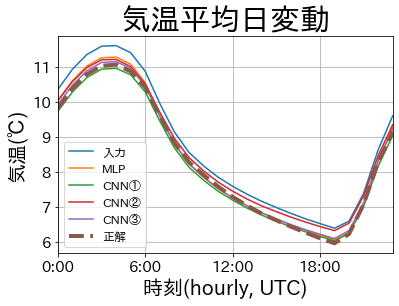

In [ ]:
plt.plot([data[i::24,6300+900:6300+1800].mean() - 273.15 for i in range(24)], label='入力')
plt.plot([data[i::24,6300*2+900:6300*2+1800].mean() - 273.15 for i in range(24)], label='MLP')
plt.plot([data[i::24,6300*3+900:6300*3+1800].mean() - 273.15 for i in range(24)], label='CNN①')
plt.plot([data[i::24,6300*4+900:6300*4+1800].mean() - 273.15 for i in range(24)], label='CNN②')
plt.plot([data[i::24,6300*5+900:6300*5+1800].mean() - 273.15 for i in range(24)], label='CNN③')
plt.plot([data[i::24,900:1800].mean() - 273.15 for i in range(24)], label='正解', linewidth=4, linestyle='--')
plt.xticks([0,6,12,18,24], ['0:00', '6:00', '12:00', '18:00', '24:00'], fontsize=15)
plt.xlim(0,23)
plt.xlabel('時刻(hourly, UTC)', fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('気温(℃)', fontsize=20)
plt.title('気温平均日変動', fontsize=30)
plt.legend(fontsize=12)
plt.grid()
plt.show()

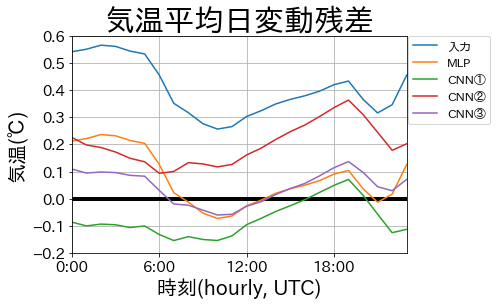

In [ ]:
plt.plot(range(0,24), [0]*24, color='black', linewidth=4)
plt.plot([data[i::24,6300+900:6300+1800].mean() - data[i::24,900:1800].mean() for i in range(24)], label='入力')
plt.plot([data[i::24,6300*2+900:6300*2+1800].mean() - data[i::24,900:1800].mean() for i in range(24)], label='MLP')
plt.plot([data[i::24,6300*3+900:6300*3+1800].mean() - data[i::24,900:1800].mean() for i in range(24)], label='CNN①')
plt.plot([data[i::24,6300*4+900:6300*4+1800].mean() - data[i::24,900:1800].mean() for i in range(24)], label='CNN②')
plt.plot([data[i::24,6300*5+900:6300*5+1800].mean() - data[i::24,900:1800].mean() for i in range(24)], label='CNN③')
plt.xticks([0,6,12,18,24], ['0:00', '6:00', '12:00', '18:00', '24:00'], fontsize=15)
plt.xlim(0,23)
plt.xlabel('時刻(hourly, UTC)', fontsize=20)
plt.yticks(fontsize=15)
plt.ylim(-0.2,0.6)
plt.ylabel('気温(℃)', fontsize=20)
plt.title('気温平均日変動残差', fontsize=30)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.005,1.), borderaxespad=0)
plt.grid()
plt.show()

### 湿数(R)

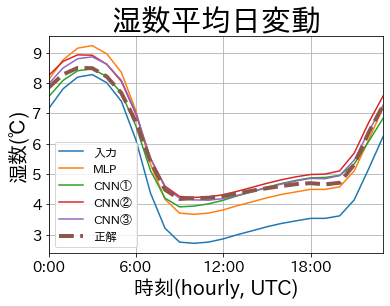

In [ ]:
plt.plot([data[i::24,6300+1800:6300+2700].mean() for i in range(24)], label='入力')
plt.plot([data[i::24,6300*2+1800:6300*2+2700].mean() for i in range(24)], label='MLP')
plt.plot([data[i::24,6300*3+1800:6300*3+2700].mean() for i in range(24)], label='CNN①')
plt.plot([data[i::24,6300*4+1800:6300*4+2700].mean() for i in range(24)], label='CNN②')
plt.plot([data[i::24,6300*5+1800:6300*5+2700].mean() for i in range(24)], label='CNN③')
plt.plot([data[i::24,1800:2700].mean() for i in range(24)], label='正解', linewidth=4, linestyle='--')
plt.xticks([0,6,12,18,24], ['0:00', '6:00', '12:00', '18:00', '24:00'], fontsize=15)
plt.xlim(0,23)
plt.xlabel('時刻(hourly, UTC)', fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel('湿数(℃)', fontsize=20)
plt.title('湿数平均日変動', fontsize=30)
plt.legend(fontsize=12, loc='lower left')
plt.grid()
plt.show()

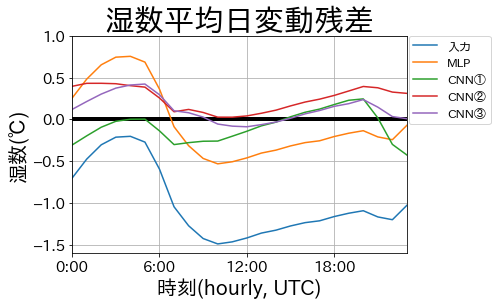

In [ ]:
plt.plot(range(0,24), [0]*24, color='black', linewidth=4)
plt.plot([data[i::24,6300+1800:6300+2700].mean() - data[i::24,1800:2700].mean() for i in range(24)], label='入力')
plt.plot([data[i::24,6300*2+1800:6300*2+2700].mean() - data[i::24,1800:2700].mean() for i in range(24)], label='MLP')
plt.plot([data[i::24,6300*3+1800:6300*3+2700].mean() - data[i::24,1800:2700].mean() for i in range(24)], label='CNN①')
plt.plot([data[i::24,6300*4+1800:6300*4+2700].mean() - data[i::24,1800:2700].mean() for i in range(24)], label='CNN②')
plt.plot([data[i::24,6300*5+1800:6300*5+2700].mean() - data[i::24,1800:2700].mean() for i in range(24)], label='CNN③')
plt.xticks([0,6,12,18,24], ['0:00', '6:00', '12:00', '18:00', '24:00'], fontsize=15)
plt.xlim(0,23)
plt.xlabel('時刻(hourly, UTC)', fontsize=20)
plt.ylim(-1.6,1)
plt.yticks(fontsize=15)
plt.ylabel('湿数(℃)', fontsize=20)
plt.title('湿数平均日変動残差', fontsize=30)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.005,1.), borderaxespad=0)
plt.grid()
plt.show()

### 風速(W)

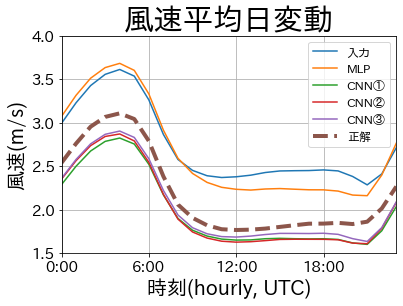

In [ ]:
plt.plot([data[i::24,6300+4500:6300+5400].mean() for i in range(24)], label='入力')
plt.plot([data[i::24,6300*2+4500:6300*2+5400].mean() for i in range(24)], label='MLP')
plt.plot([data[i::24,6300*3+4500:6300*3+5400].mean() for i in range(24)], label='CNN①')
plt.plot([data[i::24,6300*4+4500:6300*4+5400].mean() for i in range(24)], label='CNN②')
plt.plot([data[i::24,6300*5+4500:6300*5+5400].mean() for i in range(24)], label='CNN③')
plt.plot([data[i::24,4500:5400].mean() for i in range(24)], label='正解', linewidth=4, linestyle='--')
plt.xticks([0,6,12,18,24], ['0:00', '6:00', '12:00', '18:00', '24:00'], fontsize=15)
plt.xlim(0,23)
plt.xlabel('時刻(hourly, UTC)', fontsize=20)
plt.ylim(1.5, 4)
plt.yticks(fontsize=15)
plt.ylabel('風速(m/s)', fontsize=20)
plt.title('風速平均日変動', fontsize=30)
plt.legend(fontsize=12, loc='upper right')
plt.grid()
plt.show()

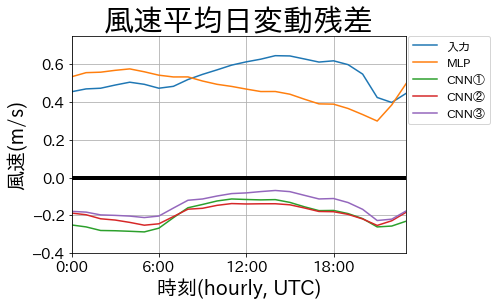

In [ ]:
plt.plot(range(0,24), [0]*24, color='black', linewidth=4)
plt.plot([data[i::24,6300+4500:6300+5400].mean() - data[i::24,4500:5400].mean() for i in range(24)], label='入力')
plt.plot([data[i::24,6300*2+4500:6300*2+5400].mean() - data[i::24,4500:5400].mean() for i in range(24)], label='MLP')
plt.plot([data[i::24,6300*3+4500:6300*3+5400].mean() - data[i::24,4500:5400].mean() for i in range(24)], label='CNN①')
plt.plot([data[i::24,6300*4+4500:6300*4+5400].mean() - data[i::24,4500:5400].mean() for i in range(24)], label='CNN②')
plt.plot([data[i::24,6300*5+4500:6300*5+5400].mean() - data[i::24,4500:5400].mean() for i in range(24)], label='CNN③')
plt.xticks([0,6,12,18,24], ['0:00', '6:00', '12:00', '18:00', '24:00'], fontsize=15)
plt.xlim(0,23)
plt.xlabel('時刻(hourly, UTC)', fontsize=20)
plt.ylim(-0.4, 0.75)
plt.yticks(fontsize=15)
plt.ylabel('風速(m/s)', fontsize=20)
plt.title('風速平均日変動残差', fontsize=30)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.005,1.), borderaxespad=0)
plt.grid()
plt.show()

## 領域マップ

### 統計量

#### 降水量(P)

##### 時系列方向合計降水量

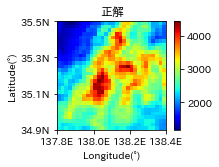

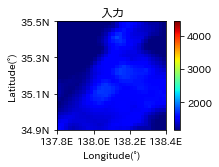

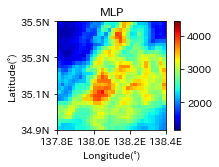

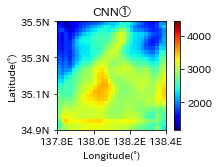

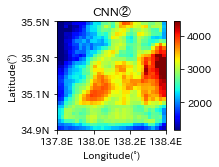

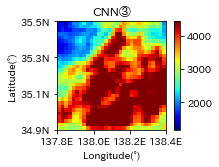

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,:900].sum(axis=0).min()
cmax = data[:,:900].sum(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i:6300*i+900].sum(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向最大降水量

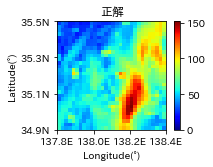

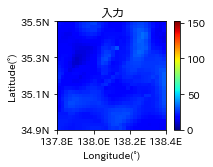

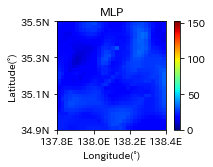

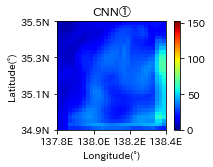

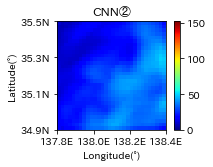

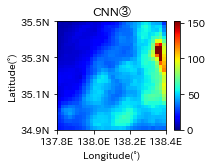

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = 0#data[:,:900].max(axis=0).min()
cmax = data[:,:900].max(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i:6300*i+900].max(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向降水量99.9%タイル値

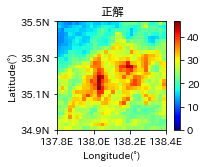

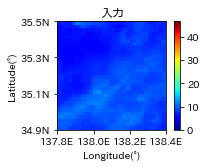

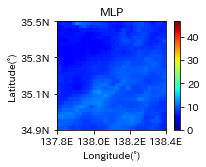

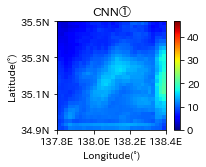

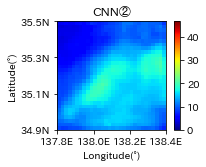

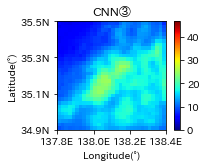

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = 0#np.percentile(data[:,:900], q=99.9, axis=0).min()
cmax = np.percentile(data[:,:900], q=99.9, axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.percentile(data[:,6300*i:6300*i+900], q=99.9, axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向降水量99%タイル値

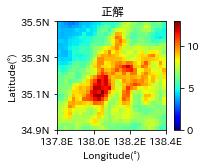

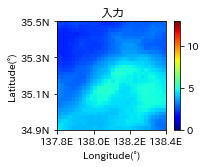

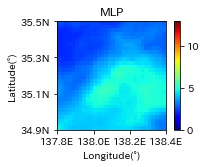

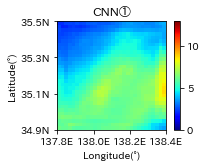

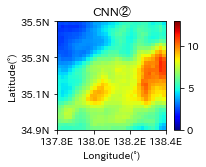

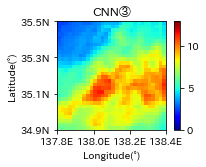

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = 0#np.percentile(data[:,:900], q=99, axis=0).min()
cmax = np.percentile(data[:,:900], q=99, axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.percentile(data[:,6300*i:6300*i+900], q=99, axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向降水量90%タイル値

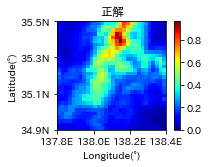

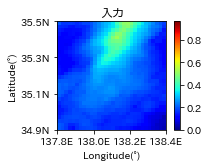

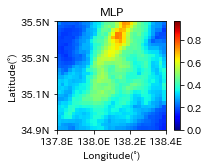

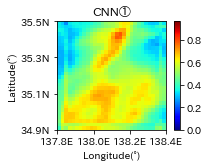

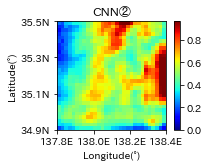

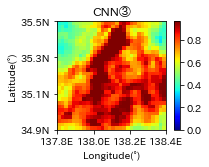

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = 0#np.percentile(data[:,:900], q=90, axis=0).min()
cmax = np.percentile(data[:,:900], q=90, axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.percentile(data[:,6300*i:6300*i+900], q=90, axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向降水量50%タイル値

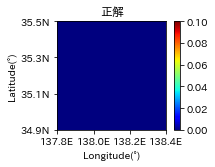

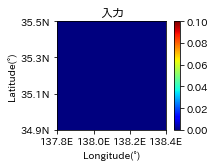

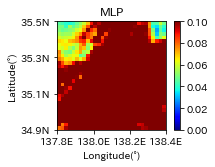

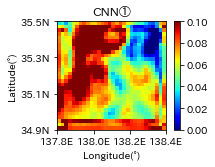

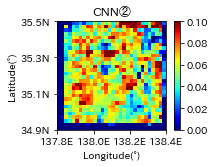

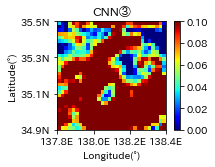

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = 0#np.percentile(data[:,:900], q=50, axis=0).min()
cmax = 0.1#np.percentile(data[:,:900], q=50, axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.percentile(data[:,6300*i:6300*i+900], q=50, axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 気温(T)

##### 時系列方向平均気温

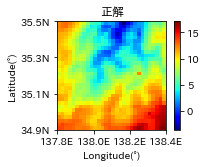

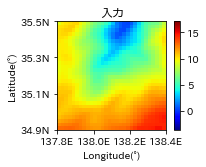

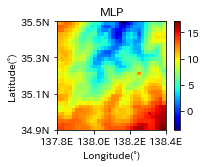

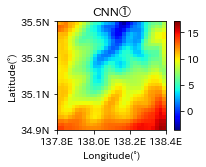

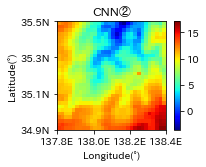

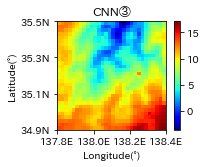

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,900:1800].mean(axis=0).min() - 273.15
cmax = data[:,900:1800].mean(axis=0).max() - 273.15
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+900:6300*i+1800].mean(axis=0).reshape((30,30))[::-1] - 273.15, cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向最高気温

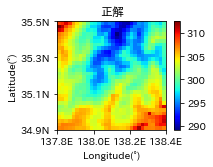

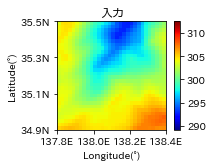

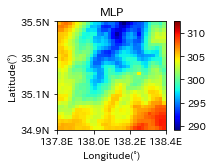

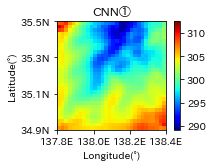

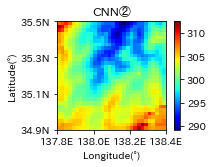

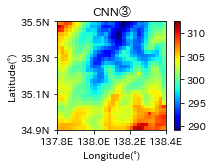

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,900:1800].max(axis=0).min()
cmax = data[:,900:1800].max(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+900:6300*i+1800].max(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向最低気温

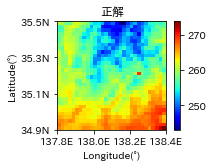

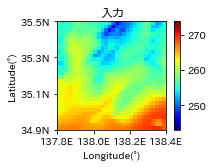

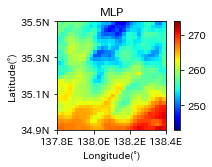

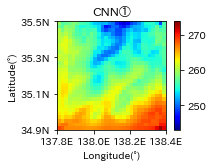

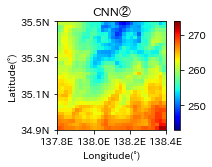

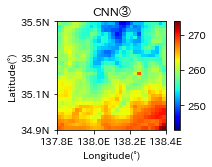

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,900:1800].min(axis=0).min()
cmax = data[:,900:1800].min(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+900:6300*i+1800].min(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 湿数(R)

##### 時系列方向平均湿数

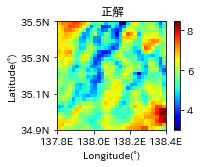

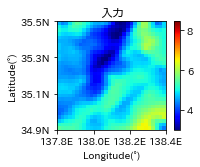

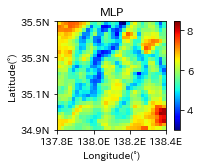

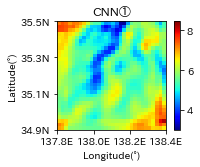

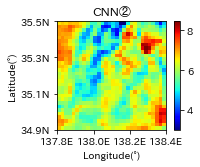

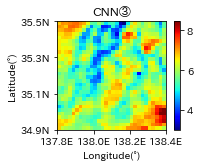

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,1800:2700].mean(axis=0).min()
cmax = data[:,1800:2700].mean(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+1800:6300*i+2700].mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向最高湿数

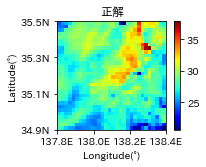

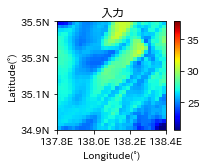

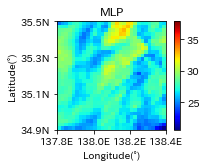

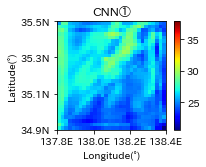

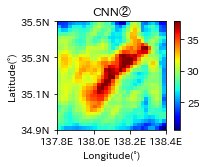

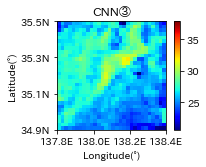

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,1800:2700].max(axis=0).min()
cmax = data[:,1800:2700].max(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+1800:6300*i+2700].max(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向最低湿数

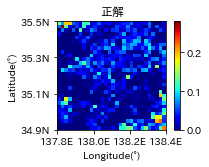

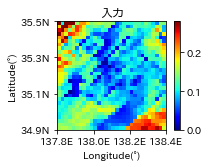

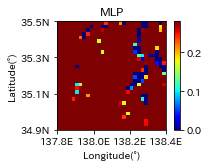

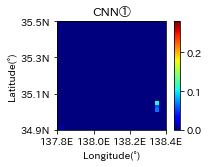

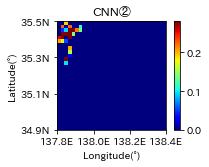

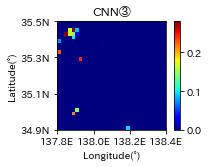

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,1800:2700].min(axis=0).min()
cmax = data[:,1800:2700].min(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+1800:6300*i+2700].min(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 東西風(U)

##### 時系列方向平均東西風

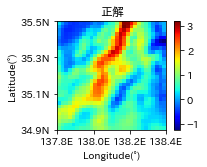

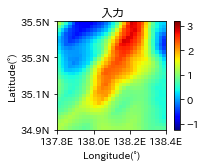

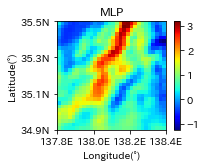

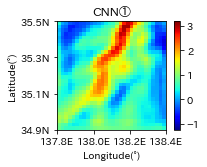

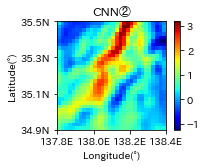

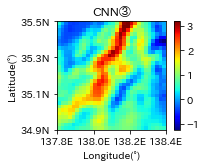

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,2700:3600].mean(axis=0).min()
cmax = data[:,2700:3600].mean(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+2700:6300*i+3600].mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 南北風(V)

##### 時系列方向平均南北風

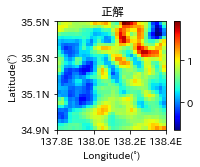

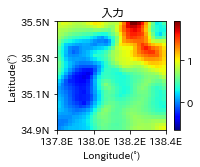

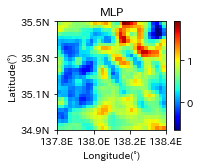

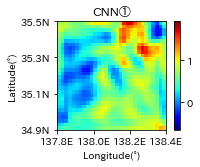

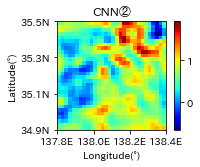

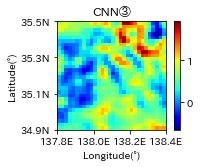

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,3600:4500].mean(axis=0).min()
cmax = data[:,3600:4500].mean(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+3600:6300*i+4500].mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 風速(W)

##### 時系列方向平均風速

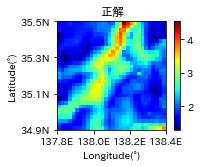

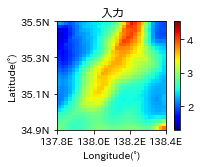

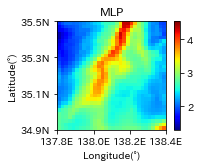

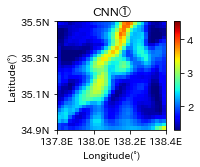

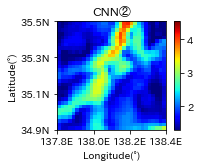

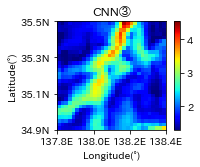

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,4500:5400].mean(axis=0).min()
cmax = data[:,4500:5400].mean(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+4500:6300*i+5400].mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

##### 時系列方向最大風速

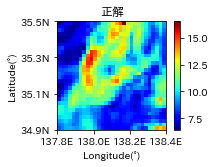

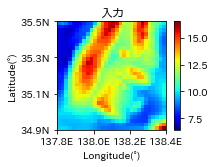

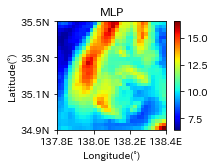

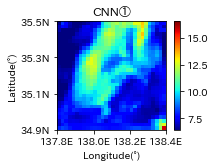

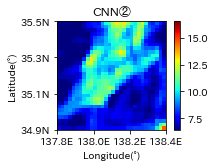

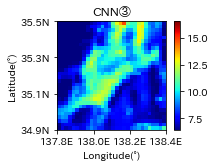

In [ ]:
# カラーバー範囲：正解の最小-最大
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = data[:,4500:5400].max(axis=0).min()
cmax = data[:,4500:5400].max(axis=0).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(data[:,6300*i+4500:6300*i+5400].max(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

### RMSE

#### 降水量(P)

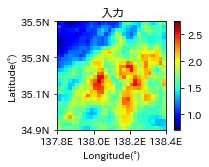

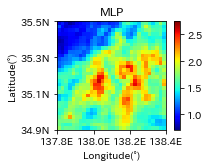

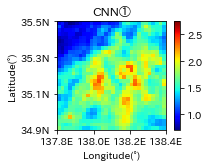

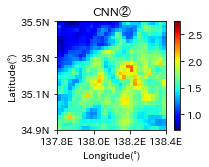

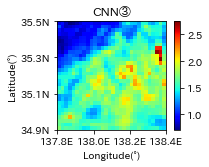

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([np.sqrt(((data[:,6300*(j+1):6300*(j+1)+900] - data[:,:900])**2).mean(axis=0)).min() for j in range(5)])
cmax = max([np.sqrt(((data[:,6300*(j+1):6300*(j+1)+900] - data[:,:900])**2).mean(axis=0)).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.sqrt(((data[:,6300*(i+1):6300*(i+1)+900] - data[:,:900])**2).mean(axis=0)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 気温(T)

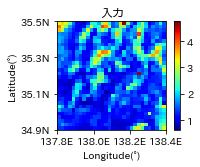

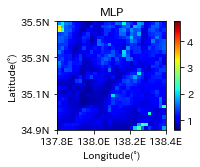

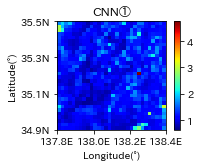

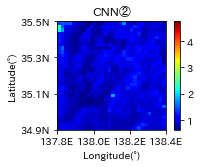

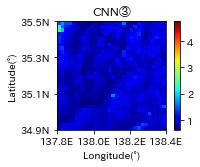

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([np.sqrt(((data[:,6300*(j+1)+900:6300*(j+1)+1800] - data[:,900:1800])**2).mean(axis=0)).min() for j in range(5)])
cmax = max([np.sqrt(((data[:,6300*(j+1)+900:6300*(j+1)+1800] - data[:,900:1800])**2).mean(axis=0)).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.sqrt(((data[:,6300*(i+1)+900:6300*(i+1)+1800] - data[:,900:1800])**2).mean(axis=0)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 湿数(R)

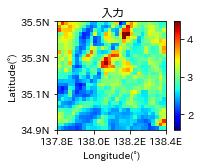

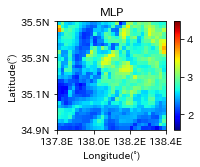

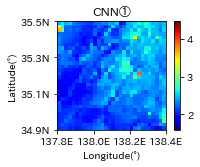

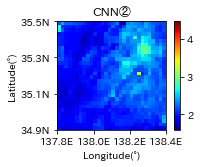

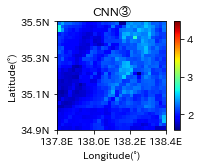

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([np.sqrt(((data[:,6300*(j+1)+1800:6300*(j+1)+2700] - data[:,1800:2700])**2).mean(axis=0)).min() for j in range(5)])
cmax = max([np.sqrt(((data[:,6300*(j+1)+1800:6300*(j+1)+2700] - data[:,1800:2700])**2).mean(axis=0)).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.sqrt(((data[:,6300*(i+1)+1800:6300*(i+1)+2700] - data[:,1800:2700])**2).mean(axis=0)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 東西風(U)

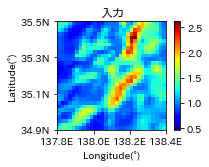

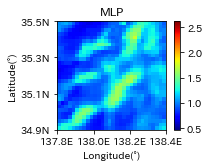

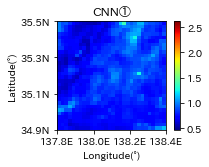

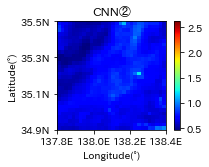

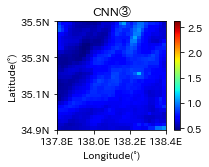

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([np.sqrt(((data[:,6300*(j+1)+2700:6300*(j+1)+3600] - data[:,2700:3600])**2).mean(axis=0)).min() for j in range(5)])
cmax = max([np.sqrt(((data[:,6300*(j+1)+2700:6300*(j+1)+3600] - data[:,2700:3600])**2).mean(axis=0)).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.sqrt(((data[:,6300*(i+1)+2700:6300*(i+1)+3600] - data[:,2700:3600])**2).mean(axis=0)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 南北風(V)

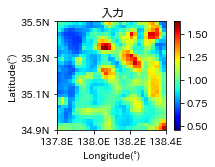

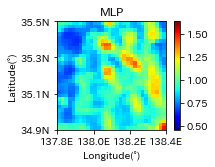

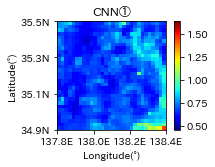

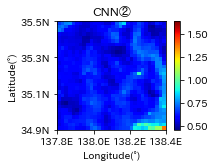

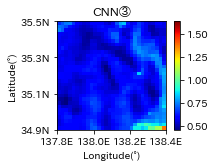

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([np.sqrt(((data[:,6300*(j+1)+3600:6300*(j+1)+4500] - data[:,3600:4500])**2).mean(axis=0)).min() for j in range(5)])
cmax = max([np.sqrt(((data[:,6300*(j+1)+3600:6300*(j+1)+4500] - data[:,3600:4500])**2).mean(axis=0)).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.sqrt(((data[:,6300*(i+1)+3600:6300*(i+1)+4500] - data[:,3600:4500])**2).mean(axis=0)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 風速(W)

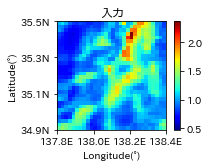

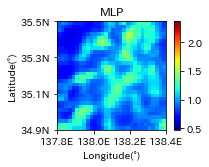

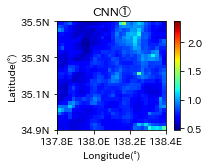

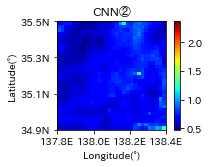

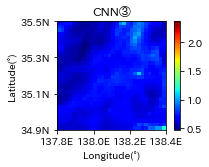

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([np.sqrt(((data[:,6300*(j+1)+4500:6300*(j+1)+5400] - data[:,4500:5400])**2).mean(axis=0)).min() for j in range(5)])
cmax = max([np.sqrt(((data[:,6300*(j+1)+4500:6300*(j+1)+5400] - data[:,4500:5400])**2).mean(axis=0)).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow(np.sqrt(((data[:,6300*(i+1)+4500:6300*(i+1)+5400] - data[:,4500:5400])**2).mean(axis=0)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

### ME

#### 降水量(P)

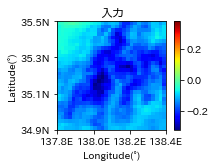

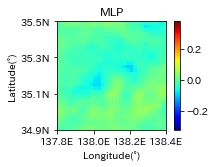

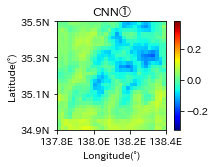

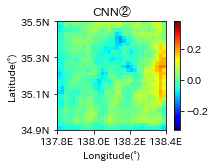

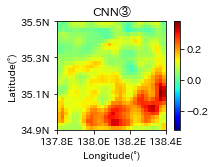

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([(data[:,6300*(j+1):6300*(j+1)+900] - data[:,:900]).mean(axis=0).min() for j in range(5)])
cmax = max([(data[:,6300*(j+1):6300*(j+1)+900] - data[:,:900]).mean(axis=0).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((data[:,6300*(i+1):6300*(i+1)+900] - data[:,:900]).mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 気温(T)

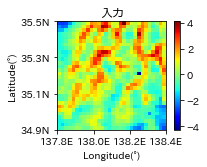

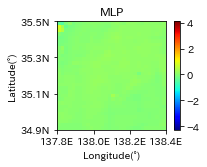

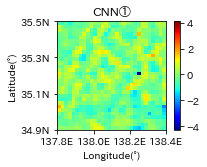

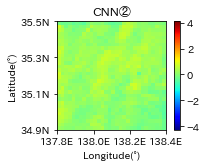

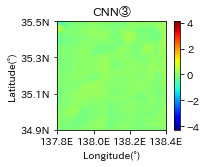

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([(data[:,6300*(j+1)+900:6300*(j+1)+1800] - data[:,900:1800]).mean(axis=0).min() for j in range(5)])
cmax = max([(data[:,6300*(j+1)+900:6300*(j+1)+1800] - data[:,900:1800]).mean(axis=0).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((data[:,6300*(i+1)+900:6300*(i+1)+1800] - data[:,900:1800]).mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 湿数(R)

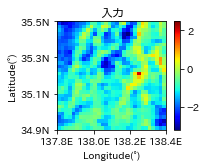

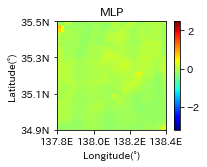

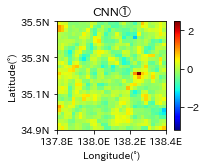

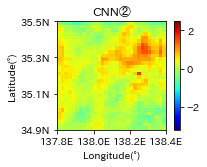

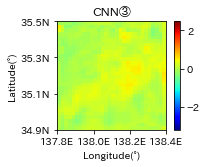

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([(data[:,6300*(j+1)+1800:6300*(j+1)+2700] - data[:,1800:2700]).mean(axis=0).min() for j in range(5)])
cmax = max([(data[:,6300*(j+1)+1800:6300*(j+1)+2700] - data[:,1800:2700]).mean(axis=0).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((data[:,6300*(i+1)+1800:6300*(i+1)+2700] - data[:,1800:2700]).mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 東西風(U)

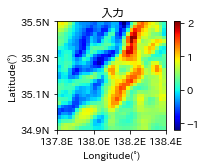

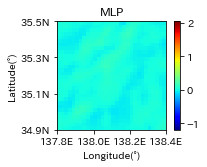

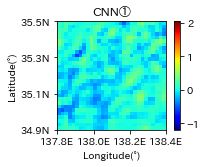

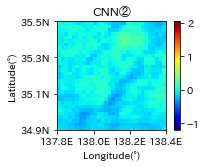

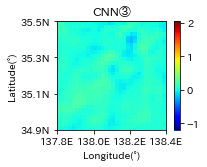

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([(data[:,6300*(j+1)+2700:6300*(j+1)+3600] - data[:,2700:3600]).mean(axis=0).min() for j in range(5)])
cmax = max([(data[:,6300*(j+1)+2700:6300*(j+1)+3600] - data[:,2700:3600]).mean(axis=0).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((data[:,6300*(i+1)+2700:6300*(i+1)+3600] - data[:,2700:3600]).mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 南北風(V)

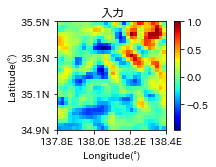

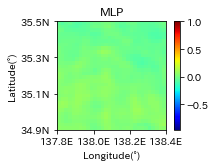

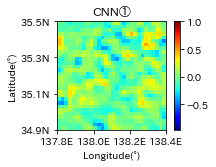

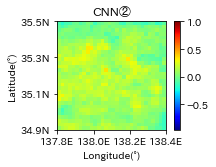

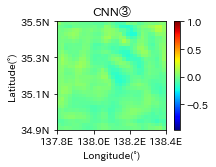

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([(data[:,6300*(j+1)+3600:6300*(j+1)+4500] - data[:,3600:4500]).mean(axis=0).min() for j in range(5)])
cmax = max([(data[:,6300*(j+1)+3600:6300*(j+1)+4500] - data[:,3600:4500]).mean(axis=0).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((data[:,6300*(i+1)+3600:6300*(i+1)+4500] - data[:,3600:4500]).mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 風速(W)

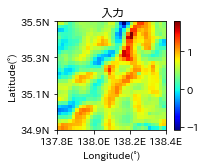

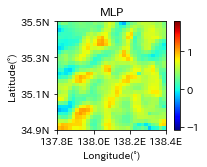

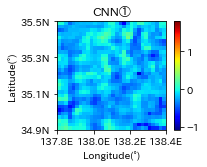

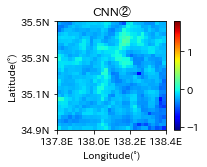

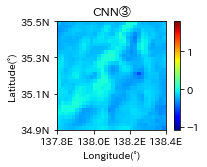

In [ ]:
# カラーバー範囲：最小-最大
titles = ['入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
cmin = min([(data[:,6300*(j+1)+4500:6300*(j+1)+5400] - data[:,4500:5400]).mean(axis=0).min() for j in range(5)])
cmax = max([(data[:,6300*(j+1)+4500:6300*(j+1)+5400] - data[:,4500:5400]).mean(axis=0).max() for j in range(5)])
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((data[:,6300*(i+1)+4500:6300*(i+1)+5400] - data[:,4500:5400]).mean(axis=0).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

### 発生確率

#### 降水量0.1mm/h以上の発生確率

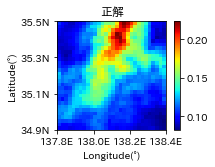

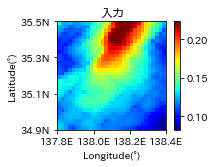

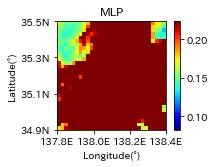

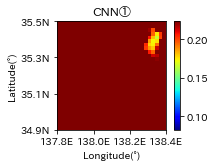

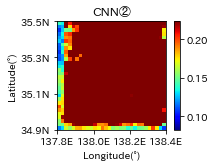

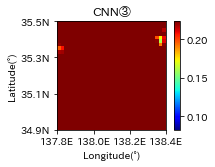

In [ ]:
# カラーバー範囲：正解の最小-最大
titles, threshold = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③'], 0.1
cmin, cmax = (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).min(), (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((np.count_nonzero(data[:,6300*i:6300*i+900]>threshold, axis=0) / len(data)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 降水量1mm/h以上の発生確率

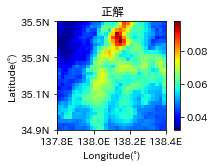

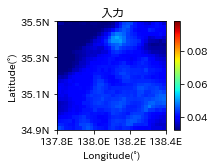

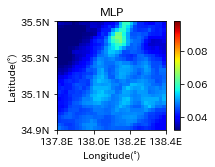

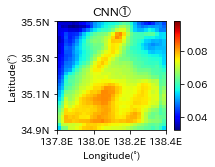

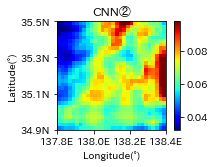

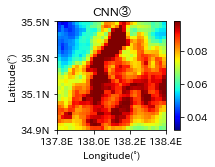

In [ ]:
# カラーバー範囲：正解の最小-最大
titles, threshold = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③'], 1
cmin, cmax = (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).min(), (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((np.count_nonzero(data[:,6300*i:6300*i+900]>threshold, axis=0) / len(data)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 降水量4mm/h以上の発生確率

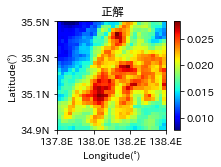

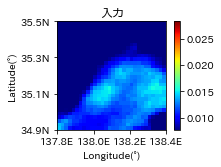

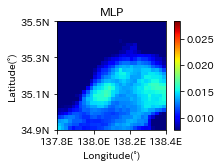

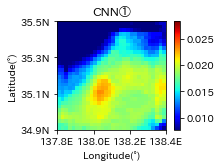

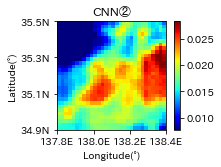

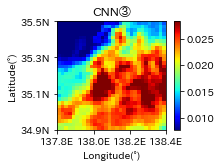

In [ ]:
# カラーバー範囲：正解の最小-最大
titles, threshold = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③'], 4
cmin, cmax = (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).min(), (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((np.count_nonzero(data[:,6300*i:6300*i+900]>threshold, axis=0) / len(data)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 降水量10mm/h以上の発生確率

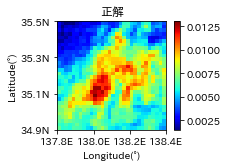

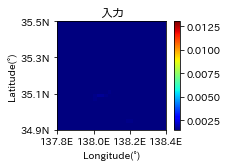

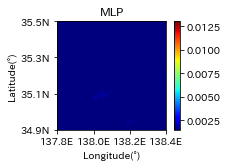

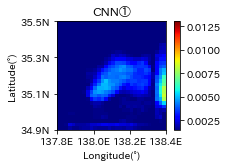

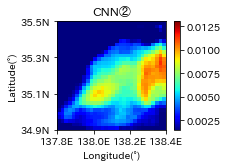

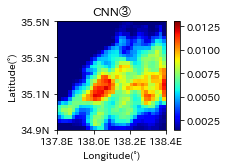

In [ ]:
# カラーバー範囲：正解の最小-最大
titles, threshold = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③'], 10
cmin, cmax = (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).min(), (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((np.count_nonzero(data[:,6300*i:6300*i+900]>threshold, axis=0) / len(data)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

#### 降水量30mm/h以上の発生確率

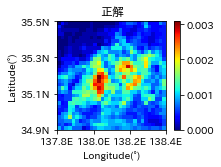

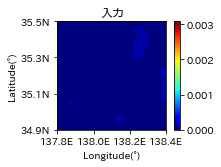

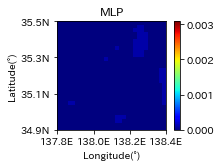

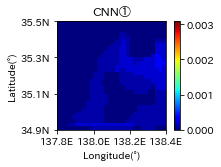

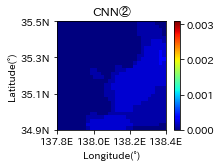

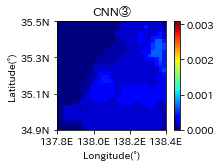

In [ ]:
# カラーバー範囲：正解の最小-最大
titles, threshold = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③'], 30
cmin, cmax = (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).min(), (np.count_nonzero(data[:,:900]>threshold, axis=0) / len(data)).max()
for i,title in enumerate(titles):
  plt.figure(figsize=(3,2))
  plt.imshow((np.count_nonzero(data[:,6300*i:6300*i+900]>threshold, axis=0) / len(data)).reshape((30,30))[::-1], cmap='jet')
  plt.xticks(ticks=[-0.5,9.5,19.5,29.5], labels=['137.8E','138.0E','138.2E','138.4E'])
  plt.yticks(ticks=[-0.5,9.5,19.5,29.5], labels=['35.5N','35.3N','35.1N','34.9N'])
  plt.xlabel('Longitude(°)')
  plt.ylabel('Latitude(°)')
  plt.title(title)
  plt.colorbar()
  plt.clim(cmin,cmax)
  plt.show()

## 散布図(yyplot)

### 降水量(P)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


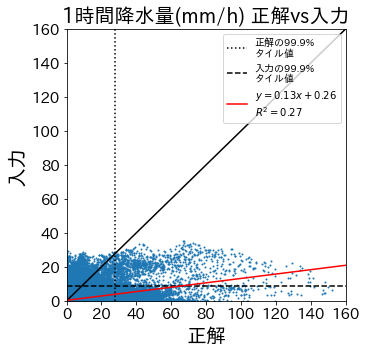

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


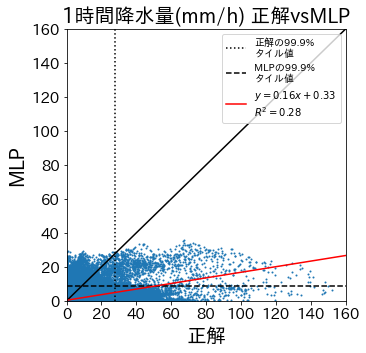

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


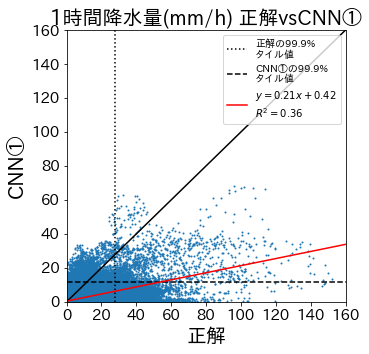

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


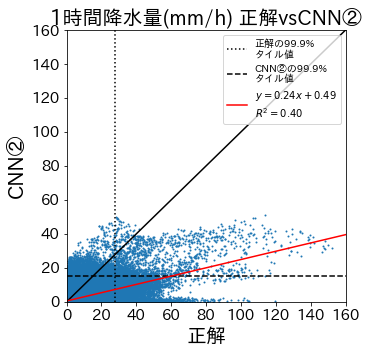

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


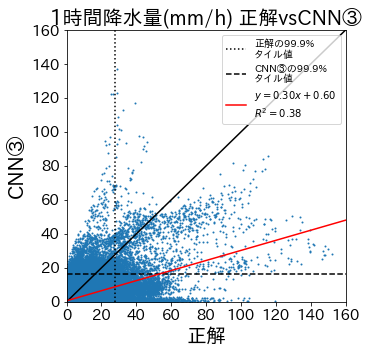

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
x = np.linspace(0,160,161)
for i, title in enumerate(titles[1:]):
  coef = np.polyfit(data[:,:900].reshape(-1), data[:,(i+1)*6300:(i+1)*6300+900].reshape(-1), 1)
  y = np.poly1d(coef)(x)
  plt.figure(figsize=(5,5))
  plt.plot(x, x, color='black')
  plt.plot([np.percentile(data[:,:900], q=99.9)]*161, x, color='black', linestyle=':', label='正解の99.9%\nタイル値')
  plt.plot(x, [np.percentile(data[:,6300*(i+1):6300*(i+1)+900], q=99.9)]*161, color='black', linestyle='--', label=f'{title}の99.9%\nタイル値')
  plt.scatter(data[:,:900].reshape(-1), data[:,(i+1)*6300:(i+1)*6300+900].reshape(-1), s=1)
  plt.plot(x, y, label=f'$y={coef[0]:3.2f}x+{coef[1]:3.2f}$\n$R^2={r2_score(data[:,:900].reshape(-1), data[:,(i+1)*6300:(i+1)*6300+900].reshape(-1)):3.2f}$', color='red')
  plt.xlabel(titles[0], fontsize=20)# Precipitation Per Hour
  plt.ylabel(title, fontsize=20)# Frequency
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlim(0,160)
  plt.ylim(0,160)
  t = f'1時間降水量(mm/h) 正解vs{title}'
  plt.title(t, fontsize=20)
  plt.legend(loc='upper right')
  plt.show()

### 気温(T)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


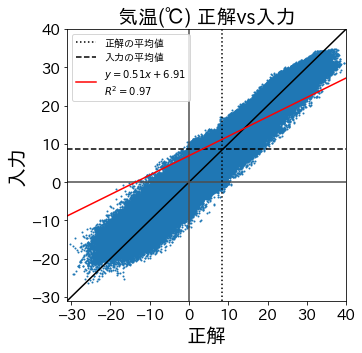

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


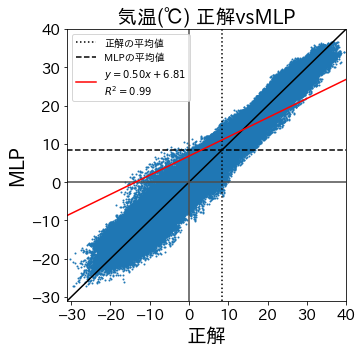

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


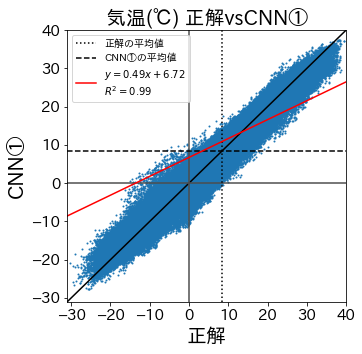

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


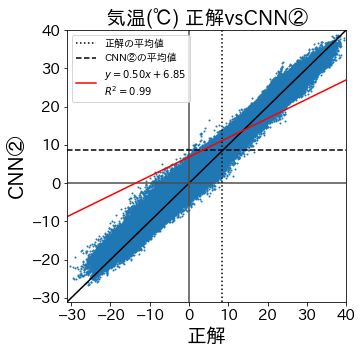

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


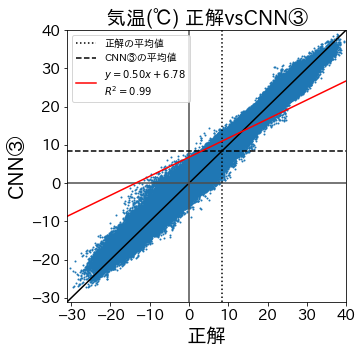

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
x = np.linspace(-31,40,72)
for i, title in enumerate(titles[1:]):
  coef = np.polyfit(data[:,900:1800].reshape(-1) - 273.15, data[:,(i+1)*6300+900:(i+1)*6300+1800].reshape(-1) - 273.15, 1)
  y = np.poly1d(coef)(x)
  plt.figure(figsize=(5,5))
  plt.plot(x, x, color='black')
  plt.plot([0]*72, x, color='0.3')
  plt.plot(x, [0]*72, color='0.3')
  plt.plot([data[:,900:1800].mean() - 273.15]*72, x, color='black', linestyle=':', label='正解の平均値')
  plt.plot(x, [data[:,6300*(i+1)+900:6300*(i+1)+1800].mean() - 273.15]*72, color='black', linestyle='--', label=f'{title}の平均値')
  plt.scatter(data[:,900:1800].reshape(-1) - 273.15, data[:,(i+1)*6300+900:(i+1)*6300+1800].reshape(-1) - 273.15, s=1)
  plt.plot(x, y, label=f'$y={coef[0]:3.2f}x+{coef[1]:3.2f}$\n$R^2={r2_score(data[:,900:1800].reshape(-1) - 273.15, data[:,(i+1)*6300+900:(i+1)*6300+1800].reshape(-1) - 273.15):3.2f}$', color='red')
  plt.xlabel(titles[0], fontsize=20)
  plt.ylabel(title, fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlim(-31,40)
  plt.ylim(-31,40)
  t = f'気温(℃) 正解vs{title}'
  plt.title(t, fontsize=20)
  plt.legend(loc='upper left')
  plt.show()

### 湿度(R)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


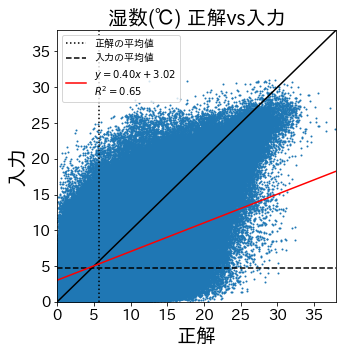

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


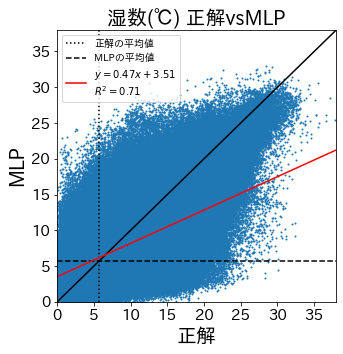

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


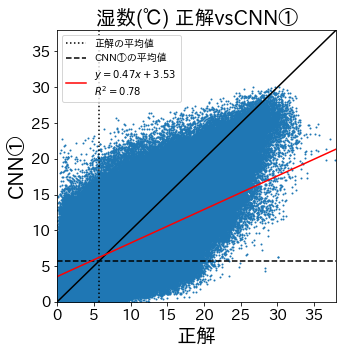

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


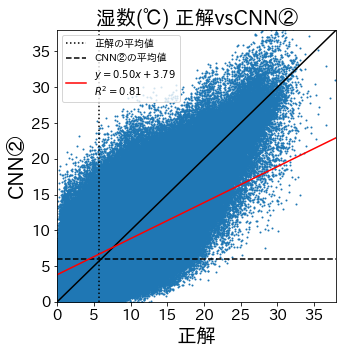

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


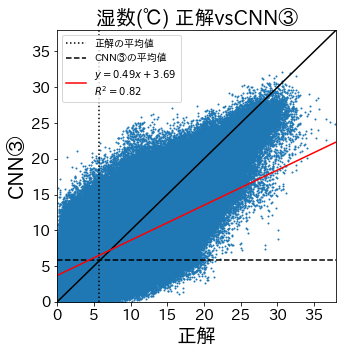

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
x = np.linspace(0,38,39)
for i, title in enumerate(titles[1:]):
  coef = np.polyfit(data[:,1800:2700].reshape(-1), data[:,(i+1)*6300+1800:(i+1)*6300+2700].reshape(-1), 1)
  y = np.poly1d(coef)(x)
  plt.figure(figsize=(5,5))
  plt.plot(x, x, color='black')
  plt.plot([data[:,1800:2700].mean()]*39, x, color='black', linestyle=':', label='正解の平均値')
  plt.plot(x, [data[:,6300*(i+1)+1800:6300*(i+1)+2700].mean()]*39, color='black', linestyle='--', label=f'{title}の平均値')
  plt.scatter(data[:,1800:2700].reshape(-1), data[:,(i+1)*6300+1800:(i+1)*6300+2700].reshape(-1), s=1)
  plt.plot(x, y, label=f'$y={coef[0]:3.2f}x+{coef[1]:3.2f}$\n$R^2={r2_score(data[:,1800:2700].reshape(-1), data[:,(i+1)*6300+1800:(i+1)*6300+2700].reshape(-1)):3.2f}$', color='red')
  plt.xlabel(titles[0], fontsize=20)
  plt.ylabel(title, fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlim(0,38)
  plt.ylim(0,38)
  t = f'湿数(℃) 正解vs{title}'
  plt.title(t, fontsize=20)
  plt.legend()
  plt.show()

### 風速(W)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


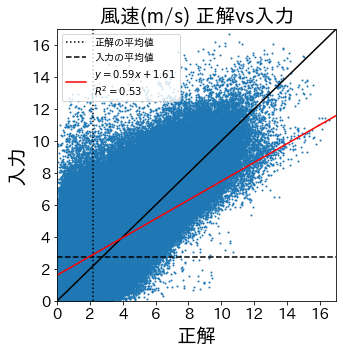

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


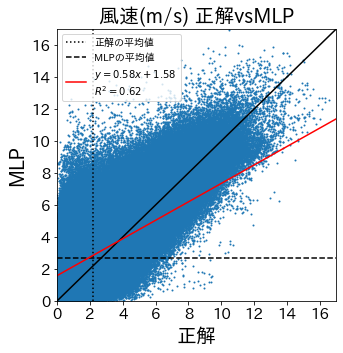

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


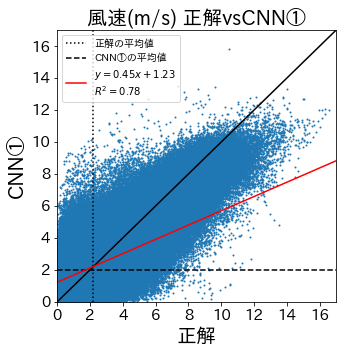

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


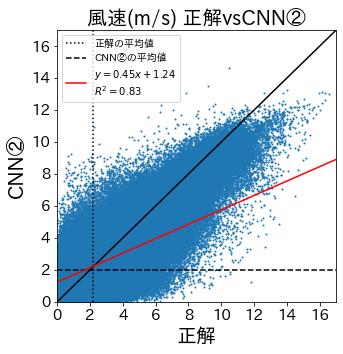

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


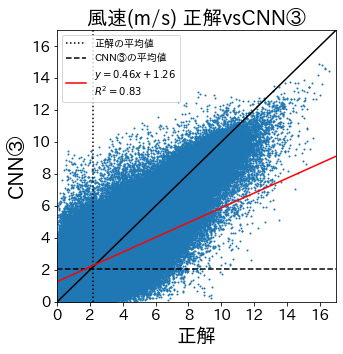

In [ ]:
titles = ['正解', '入力', 'MLP', 'CNN①', 'CNN②', 'CNN③']
x = np.linspace(0,17,18)
for i, title in enumerate(titles[1:]):
  coef = np.polyfit(data[:,4500:5400].reshape(-1), data[:,(i+1)*6300+4500:(i+1)*6300+5400].reshape(-1), 1)
  y = np.poly1d(coef)(x)
  plt.figure(figsize=(5,5))
  plt.plot(x, x, color='black')
  plt.plot([data[:,4500:5400].mean()]*18, x, color='black', linestyle=':', label='正解の平均値')
  plt.plot(x, [data[:,6300*(i+1)+4500:6300*(i+1)+5400].mean()]*18, color='black', linestyle='--', label=f'{title}の平均値')
  plt.scatter(data[:,4500:5400].reshape(-1), data[:,(i+1)*6300+4500:(i+1)*6300+5400].reshape(-1), s=1)
  plt.plot(x, y, label=f'$y={coef[0]:3.2f}x+{coef[1]:3.2f}$\n$R^2={r2_score(data[:,4500:5400].reshape(-1), data[:,(i+1)*6300+4500:(i+1)*6300+5400].reshape(-1)):3.2f}$', color='red')
  plt.xlabel(titles[0], fontsize=20)
  plt.ylabel(title, fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlim(0,17)
  plt.ylim(0,17)
  t = f'風速(m/s) 正解vs{title}'
  plt.title(t, fontsize=20)
  plt.legend(loc='upper left')
  plt.show()